In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import BernoulliRBM


#https://datatofish.com/import-csv-file-python-using-pandas/
#https://www.kaggle.com/open-source-sports/baseball-databank/version/1#Batting.csv
#https://pandas.pydata.org/pandas-docs/stable/

In [2]:
#taken from Data Driven Decision Making with Professor Dan Runfola
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [3]:
#function created by me to take in confusion matrix
#and return an n=2 array of the scores of the nn
def predandactual(confmatrix):    
    falseNeg = confmatrix[0,1]
    trueNeg = confmatrix[1,1]
    falsePos = confmatrix[1,0]

    actualNeg = trueNeg + falsePos
    predNeg = trueNeg + falseNeg
    
    scorearray = []
    scorearray.append(trueNeg/predNeg)
    scorearray.append(trueNeg/actualNeg)
    
    return scorearray

In [4]:
#method that displays eout and ein scores
#with matplotlib.
#source: https://pythonspot.com/matplotlib-bar-chart/
def display_scores(eoutscores, einscores):
    plt.clf()

    fig, ax = plt.subplots()
    index = np.arange(3)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, eoutscores, bar_width, alpha=opacity, color='g', label='Eout')
    rects2 = plt.bar(index+bar_width, einscores, bar_width, alpha=opacity, color ='b', label='Ein')

    plt.xlabel('')
    plt.ylabel('Scores')
    plt.xticks(index + bar_width, ('Total','ActualNegative', 'PredictedNegative'))
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
#read in csv files
hof = pd.read_csv(r'HallOfFame.csv')
bat = pd.read_csv(r'Batting.csv')
pitch = pd.read_csv(r'Pitching.csv')

In [6]:
#player_ids = pd.DataFrame(master, columns=['bbrefID'])
batting_stats = pd.DataFrame(bat, columns=['playerID','G','AB','R','HR','H','2B','3B','RBI','SB'])
hall_of_fame = pd.DataFrame(hof, columns=['playerID','inducted'])
pitching_stats = pd.DataFrame(pitch, columns=['playerID','W','L','GS','CG','SHO','SV','SO','ERA','IPouts', 'ER'])

In [7]:
ids = batting_stats['playerID']
#print(ids[0])
ids_set = set()
for i in range(len(ids)):
    ids_set.add(ids[i])
#print(ids_set)

In [8]:
hall_ids = hall_of_fame['playerID']
hall_set = set()
for i in range(len(hall_ids)):
    if (hall_of_fame['inducted'][i] == 'Y'):
        hall_set.add(hall_ids[i])
#print(hall_set)

In [9]:
bat_ids = batting_stats['playerID']
pitch_ids = pitching_stats['playerID']
    
#print (len(batting_stats['playerID']))

player_set = set()
for i in range(len(bat_ids)):
    player_set.add(bat_ids[i])
for i in range(len(pitch_ids)):
    player_set.add(pitch_ids[i])
    
#print(len(player_set))


In [10]:
hit_stats = batting_stats['H']
double_stats = batting_stats['2B']
triple_stats = batting_stats['3B']
homerun_stats = batting_stats['HR']
run_stats = batting_stats['R']
rbi_stats = batting_stats['RBI']
steal_stats = batting_stats['SB']
ab_stats = batting_stats['AB']
game_stats = batting_stats['G']
win_stats = pitching_stats['W']
lose_stats = pitching_stats['L']
pitchstart_stats = pitching_stats['GS']
completegame_stats = pitching_stats['CG']
shutout_stats = pitching_stats['SHO']
save_stats = pitching_stats['SV']
strikeout_stats = pitching_stats['SO']
#era_stats = pitching_stats['ERA']
ipout_stats = pitching_stats['IPouts']
earnedrun_stats = pitching_stats['ER']

career_hits = dict.fromkeys(player_set, 0)
career_singles = dict.fromkeys(player_set, 0)
career_doubles = dict.fromkeys(player_set, 0)
career_triples = dict.fromkeys(player_set, 0)
career_homeruns = dict.fromkeys(player_set, 0)
career_runs = dict.fromkeys(player_set, 0)
career_rbis = dict.fromkeys(player_set, 0)
career_steals = dict.fromkeys(player_set, 0)
career_atbats = dict.fromkeys(player_set, 0)
career_games = dict.fromkeys(player_set, 0)
career_wins = dict.fromkeys(player_set, 0)
career_loses = dict.fromkeys(player_set, 0)
career_starts = dict.fromkeys(player_set, 0)
career_completegames = dict.fromkeys(player_set, 0)
career_shutouts = dict.fromkeys(player_set, 0)
career_saves = dict.fromkeys(player_set, 0)
career_strikeouts = dict.fromkeys(player_set, 0)
career_era = dict.fromkeys(player_set, 0)
career_innings = dict.fromkeys(player_set, 0)
career_earnedruns = dict.fromkeys(player_set, 0)

hall_dict = dict.fromkeys(player_set, 0)
#print(type(hall_of_dict))
for i in range(len(bat_ids)):
    if bat_ids[i] in player_set:
        #if (hit_stats[i] > 0):
        career_doubles[bat_ids[i]] += double_stats[i]
        career_triples[bat_ids[i]] += triple_stats[i]
        career_hits[bat_ids[i]] += hit_stats[i]
        career_homeruns[bat_ids[i]] += homerun_stats[i]
        career_runs[bat_ids[i]] += run_stats[i]
        career_rbis[bat_ids[i]] += rbi_stats[i]
        career_steals[bat_ids[i]] += steal_stats[i]
        career_atbats[bat_ids[i]] += ab_stats[i]
        career_games[bat_ids[i]] += game_stats[i]
        if bat_ids[i] in hall_set:
            hall_dict[bat_ids[i]] = 1
for i in range(len(pitch_ids)):
    if pitch_ids[i] in player_set:
        career_wins[pitch_ids[i]] += win_stats[i]
        career_loses[pitch_ids[i]] += lose_stats[i]
        career_starts[pitch_ids[i]] += pitchstart_stats[i]
        career_completegames[pitch_ids[i]] += completegame_stats[i]
        career_shutouts[pitch_ids[i]] += shutout_stats[i]
        career_saves[pitch_ids[i]] += save_stats[i]
        career_strikeouts[pitch_ids[i]] += strikeout_stats[i]
        #career_era[pitch_ids[i]] += era_stats[i]
        career_innings[pitch_ids[i]] += ipout_stats[i]
        career_earnedruns[pitch_ids[i]] += earnedrun_stats[i]
        if pitch_ids[i] in hall_set:
            hall_dict[pitch_ids[i]] = 1



In [11]:
career_slugging = dict.fromkeys(player_set, 0)
for player in player_set:
    if (career_innings[player] > 0):
        career_era[player] = (career_earnedruns[player] / (career_innings[player]/3))*9
    if (career_atbats[player] > 0):
        career_singles[player] = career_hits[player] - career_doubles[player] - career_triples[player] - career_homeruns[player]
        career_slugging[player] = (career_singles[player] + (2 * career_doubles[player]) + 
                                   (3 * career_triples[player]) + (4 * career_homeruns[player])) / career_atbats[player]

In [12]:
batterdata = [career_atbats, career_hits, career_runs, career_rbis, career_steals, career_homeruns,  career_games, career_slugging, hall_dict]
batterdf = pd.DataFrame(batterdata, index=['At Bats','Hits', 'Runs','RBIs', 'Steals', 'Home Runs', 'Games', 'Slugging', 'Inducted'])
batterdf = batterdf.transpose()
batterdf = batterdf.dropna()

pitcherdata = [career_era, career_wins, career_innings, career_strikeouts, career_loses, hall_dict]
pitcherdf = pd.DataFrame(pitcherdata, index=['ERA', 'Wins', 'IP', 'K', 'Loses', 'Inducted'])
pitcherdf = pitcherdf.transpose()
pitcherdf = pitcherdf.dropna()

In [13]:
#pitcherdf.iloc[1,0]
#print(pitcherdf)
c=0
for i in range(len(pitcherdf)):
    if (pitcherdf.iloc[c,2] < 1500): #500 innings
        pitcherdf = pitcherdf.drop(pitcherdf.index[c])
    else:
        c += 1
#print(pitcherdf)
#print(batterdf.iloc[1,0])
c=0
for i in range(len(batterdf)):
    if (batterdf.iloc[c,0] < 1000): #1000 at-bats
        batterdf = batterdf.drop(batterdf.index[c])
    else:
        c += 1


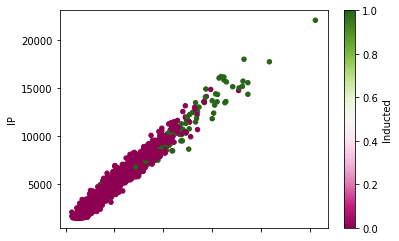

In [14]:
pitcherdf.plot.scatter("Wins", 'IP', c="Inducted", colormap = "PiYG")

In [15]:
X = batterdf.drop('Inducted', axis=1)
Xbatter = batterdf.drop('Inducted', axis=1)
y = batterdf['Inducted']
X_train, X_test, y_train, y_test = train_test_split(Xbatter,y,test_size=0.25)
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)
batclf = MLPClassifier(alpha=1, warm_start=True)
epochs = 100
for e in range(epochs):
    batclf.fit(X_train,y_train)
pred = batclf.predict(X_test)
nn_cm = confusion_matrix(y_test, pred)
print("Eout")
print_cm(nn_cm, ['Not inducted', 'Inducted'])
print(batclf.score(X_test,y_test))

print("*************************************************\nEin")

ein = batclf.predict(X_train)
ein_cm = confusion_matrix(y_train, ein)
print_cm(ein_cm, ['Not inducted', 'Inducted'])


print(batclf.score(X_train,y_train))

Eout
                 Not inducted     Inducted 
    Not inducted        801.0          4.0 
        Inducted         32.0         18.0 
0.9578947368421052
*************************************************
Ein
                 Not inducted     Inducted 
    Not inducted       2410.0         12.0 
        Inducted        100.0         43.0 
0.9563352826510721


In [ ]:
#print 1
'''
print("Eout")
print_cm(pitchnn_cm, ['Not inducted', 'Inducted'])
print("Total Score:", clf.score(X_test,y_test))
print("When Predicting Inducted:", predandactual(pitchnn_cm)[0])
print("Inducted Correctly Predicted:", predandactual(pitchnn_cm)[1])
print("*************************************************\nEin")
'''

#print 3
'''
print_cm(ein_cm, ['Not inducted', 'Inducted'])
print("Total Score:", clf.score(X_train,y_train))
print("When Predicting Inducted:", predandactual(ein_cm)[0])
print("Inducted Correctly Predicted:", predandactual(ein_cm)[1])
'''

In [25]:
def pitcher_nn(epochs, eout = True):
    Xpitcher = pitcherdf.drop('Inducted', axis=1)
    y = pitcherdf['Inducted']
    X_train, X_test, y_train, y_test = train_test_split(Xpitcher,y,test_size=0.25)
    scale_X = StandardScaler()
    X_train = scale_X.fit_transform(X_train)
    X_test = scale_X.transform(X_test)
    clf = MLPClassifier(alpha=1, warm_start=True)
    #epochs = 10
    for e in range(epochs):
        clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    pitchnn_cm = confusion_matrix(y_test, pred)
    #print 1
    ein = clf.predict(X_train)
    ein_cm = confusion_matrix(y_train, ein)
    #print 2
    eoutscores = (clf.score(X_test,y_test), predandactual(pitchnn_cm)[0],
                  predandactual(pitchnn_cm)[1])
    einscores = (clf.score(X_test,y_test), predandactual(ein_cm)[0], 
                  predandactual(ein_cm)[1])
    #display_scores(eoutscores, einscores)
    if (eout == True):
        return eoutscores
    return einscores


In [23]:
def trials(e, n, eout=True):
    #print(e)
    totalaverage = 0
    totalactualNeg = 0
    totalpredNeg = 0
    for i in range(0,n):
        temp = pitcher_nn(e, eout=eout)
        totalaverage += temp[0]
        totalactualNeg += temp[1]
        totalpredNeg += temp[2]
        
    final_array = []
    
    final_array = [totalaverage/n, totalactualNeg/n, totalpredNeg/n]
    #print(final_array)
    
    return final_array

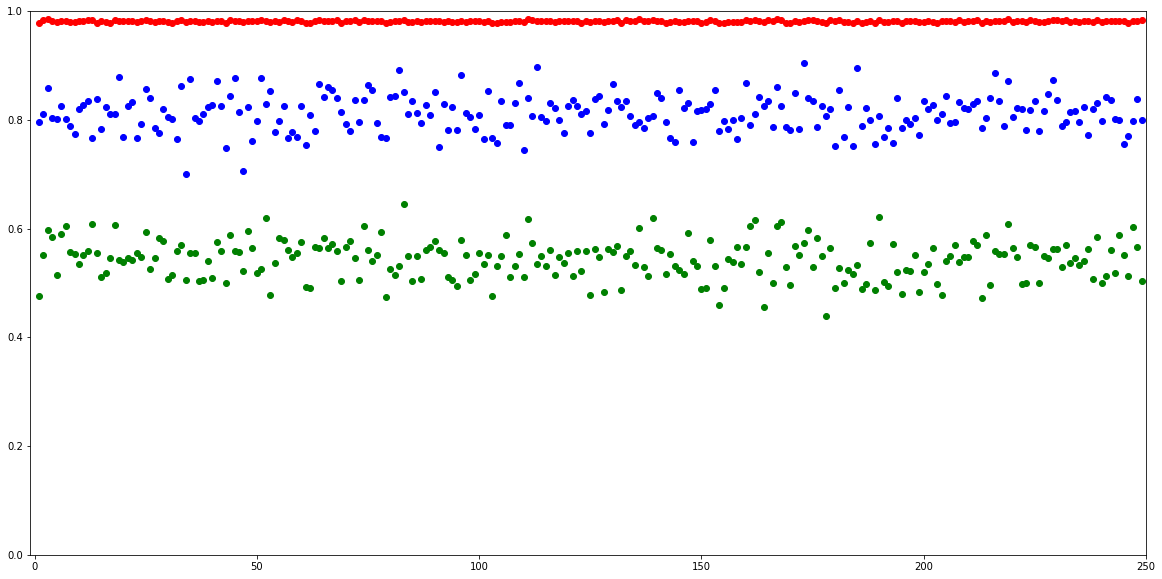

In [22]:
n = 10
epochs = 250


#plt.rcParams["figure.figsize"] = (20,10)
for e in range(1,epochs):
    temp = trials(e,n)
    plt.scatter(e, temp[0], c='r')
    plt.scatter(e, temp[1], c='b')
    plt.scatter(e, temp[2], c='g')
    
    
plt.xlim(-1, epochs)
plt.ylim(0.0, 1.0)
plt.show()
    
        

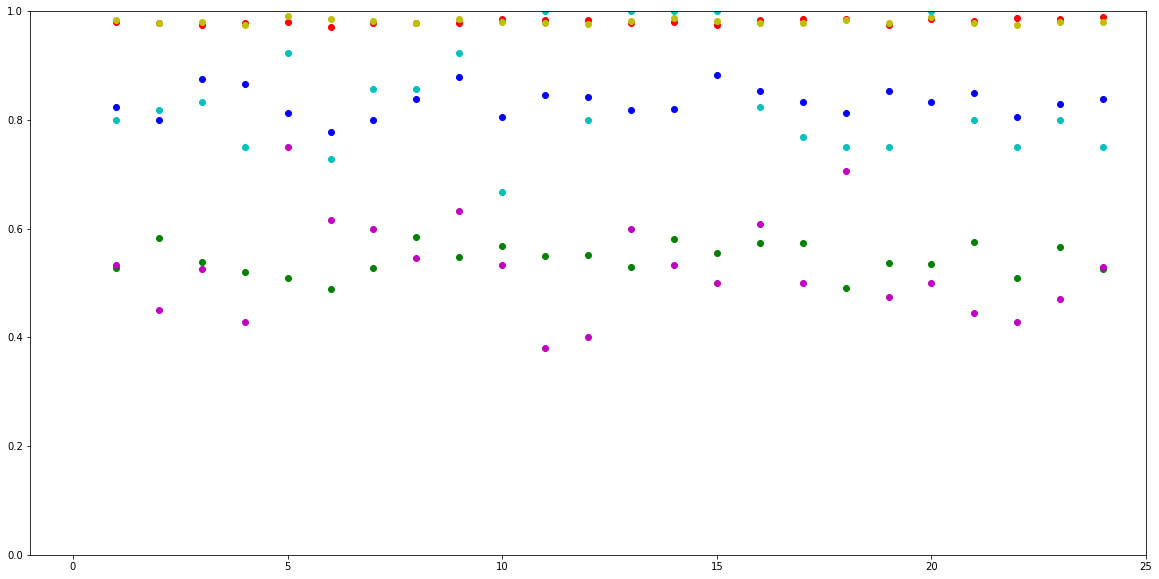

In [28]:
n = 1
epochs = 25


#plt.rcParams["figure.figsize"] = (20,10)
for e in range(1,epochs):
    temp = trials(e,n,eout=False)
    plt.scatter(e, temp[0], c='r')
    plt.scatter(e, temp[1], c='b')
    plt.scatter(e, temp[2], c='g')
    temp = trials(e,n)
    plt.scatter(e, temp[0], c='y')
    plt.scatter(e, temp[1], c='c')
    plt.scatter(e, temp[2], c='m')
    
    
plt.xlim(-1, epochs)
plt.ylim(0.0, 1.0)
plt.show()
    